In [5]:
import pandas as pd

In [6]:
weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [7]:
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
01-01-2013,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,78,87.0,NaN
02-01-2013,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,78,88.0,70.0
03-01-2013,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,78,88.0,72.0
04-01-2013,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,78,88.0,71.0
05-01-2013,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,79,88.0,71.0
...,...,...,...,...,...,...
16-04-2023,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,88,NaN,78.0
17-04-2023,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,89,102.0,78.0
18-04-2023,IN020040900,"MADRAS MINAMBAKKAM, IN",NaN,87,102.0,77.0


In [8]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.644586
TAVG       0.000000
TMAX       0.332801
TMIN       0.216813
dtype: float64

In [9]:
core_weather = weather[["PRCP","TMAX","TMIN"]].copy()

In [10]:
core_weather.columns = ["Precip", "Temp_Max", "Temp_Min"]

In [11]:
core_weather

,Precip,Temp_Max,Temp_Min
DATE,,,
01-01-2013,NaN,87.0,NaN
02-01-2013,NaN,88.0,70.0
03-01-2013,NaN,88.0,72.0
04-01-2013,NaN,88.0,71.0
05-01-2013,NaN,88.0,71.0
...,...,...,...
16-04-2023,NaN,NaN,78.0
17-04-2023,NaN,102.0,78.0
18-04-2023,NaN,102.0,77.0


In [12]:
core_weather.apply(pd.isnull).sum()/weather.shape[0]

Precip      0.644586
Temp_Max    0.332801
Temp_Min    0.216813
dtype: float64

In [13]:
core_weather["Precip"].value_counts()


0.00    515
0.02     80
0.08     61
0.04     58
0.01     56
       ... 
5.55      1
3.98      1
1.97      1
2.36      1
4.57      1
Name: Precip, Length: 100, dtype: int64

In [14]:
core_weather[pd.isnull(core_weather["Precip"])]

,Precip,Temp_Max,Temp_Min
DATE,,,
01-01-2013,NaN,87.0,NaN
02-01-2013,NaN,88.0,70.0
03-01-2013,NaN,88.0,72.0
04-01-2013,NaN,88.0,71.0
05-01-2013,NaN,88.0,71.0
...,...,...,...
16-04-2023,NaN,NaN,78.0
17-04-2023,NaN,102.0,78.0
18-04-2023,NaN,102.0,77.0


In [15]:
core_weather.loc["2013-01-05":"2013-02-11",:]

KeyError: '2013-01-05'

In [16]:
core_weather["Precip"].value_counts()

0.00    515
0.02     80
0.08     61
0.04     58
0.01     56
       ... 
5.55      1
3.98      1
1.97      1
2.36      1
4.57      1
Name: Precip, Length: 100, dtype: int64

In [17]:
core_weather["Precip"] = core_weather["Precip"].fillna(0)

In [18]:
core_weather["Precip"].value_counts()

0.00    2938
0.02      80
0.08      61
0.04      58
0.01      56
        ... 
5.55       1
3.98       1
1.97       1
2.36       1
4.57       1
Name: Precip, Length: 100, dtype: int64

In [19]:
core_weather[pd.isnull(core_weather["Temp_Max"])]

,Precip,Temp_Max,Temp_Min
DATE,,,
20-01-2013,0.0,NaN,69.0
21-05-2013,0.0,NaN,82.0
25-06-2013,0.0,NaN,82.0
18-07-2013,0.0,NaN,NaN
19-07-2013,0.0,NaN,NaN
...,...,...,...
13-04-2023,0.0,NaN,76.0
14-04-2023,0.0,NaN,76.0
16-04-2023,0.0,NaN,78.0


In [20]:
core_weather = core_weather.fillna(method = "ffill") 
#Fills the forward value with ffill

In [21]:
core_weather["Temp_Min"] = core_weather["Temp_Min"].fillna(0)

# Go down and run those code 

In [22]:
core_weather.apply(pd.isnull).sum()/weather.shape[0]

Precip      0.0
Temp_Max    0.0
Temp_Min    0.0
dtype: float64

In [23]:
core_weather.dtypes

Precip      float64
Temp_Max    float64
Temp_Min    float64
dtype: object

In [24]:
core_weather.index

Index(['01-01-2013', '02-01-2013', '03-01-2013', '04-01-2013', '05-01-2013',
       '06-01-2013', '07-01-2013', '08-01-2013', '09-01-2013', '10-01-2013',
       ...
       '11-04-2023', '12-04-2023', '13-04-2023', '14-04-2023', '15-04-2023',
       '16-04-2023', '17-04-2023', '18-04-2023', '19-04-2023', '20-04-2023'],
      dtype='object', name='DATE', length=3759)

In [25]:
core_weather.index = pd.to_datetime(core_weather.index)

C:\Users\Madhusoodhan TG\AppData\Local\Temp\ipykernel_3656\3501870966.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  core_weather.index = pd.to_datetime(core_weather.index)


In [26]:
core_weather.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01',
               ...
               '2023-11-04', '2023-12-04', '2023-04-13', '2023-04-14',
               '2023-04-15', '2023-04-16', '2023-04-17', '2023-04-18',
               '2023-04-19', '2023-04-20'],
              dtype='datetime64[ns]', name='DATE', length=3759, freq=None)

In [27]:
core_weather.apply(lambda x: (x==9999).sum())

Precip      0
Temp_Max    0
Temp_Min    0
dtype: int64

<Axes: xlabel='DATE'>

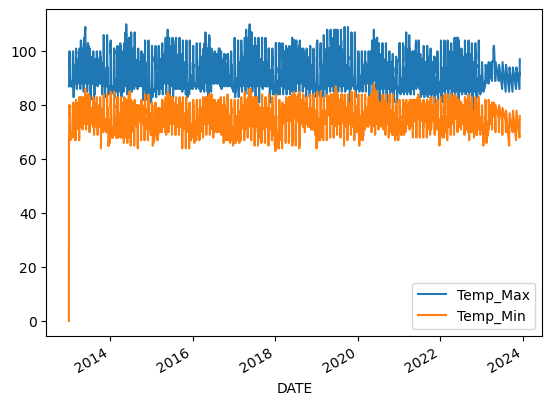

In [28]:
core_weather[["Temp_Max","Temp_Min"]].plot()

In [29]:
core_weather.index.year.value_counts().sort_index()

2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    362
2022    365
2023    110
Name: DATE, dtype: int64

<Axes: xlabel='DATE'>

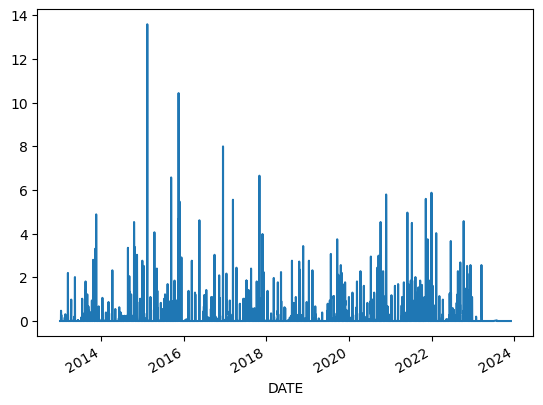

In [30]:
core_weather["Precip"].plot()

In [31]:
core_weather.groupby(core_weather.index.year).sum()["Precip"]

DATE
2013    38.42
2014    45.90
2015    95.61
2016    47.60
2017    57.98
2018    35.45
2019    50.75
2020    58.62
2021    80.60
2022    54.80
2023     3.59
Name: Precip, dtype: float64

In [32]:
core_weather["target"]= core_weather.shift(-1)["Temp_Max"]

In [33]:
core_weather

,Precip,Temp_Max,Temp_Min,target
DATE,,,,
2013-01-01,0.0,87.0,0.0,88.0
2013-02-01,0.0,88.0,70.0,88.0
2013-03-01,0.0,88.0,72.0,88.0
2013-04-01,0.0,88.0,71.0,88.0
2013-05-01,0.0,88.0,71.0,88.0
...,...,...,...,...
2023-04-16,0.0,101.0,78.0,102.0
2023-04-17,0.0,102.0,78.0,102.0
2023-04-18,0.0,102.0,77.0,102.0


In [34]:
core_weather = core_weather.iloc[:-1,:].copy()

In [35]:
core_weather

,Precip,Temp_Max,Temp_Min,target
DATE,,,,
2013-01-01,0.0,87.0,0.0,88.0
2013-02-01,0.0,88.0,70.0,88.0
2013-03-01,0.0,88.0,72.0,88.0
2013-04-01,0.0,88.0,71.0,88.0
2013-05-01,0.0,88.0,71.0,88.0
...,...,...,...,...
2023-04-15,0.0,101.0,76.0,101.0
2023-04-16,0.0,101.0,78.0,102.0
2023-04-17,0.0,102.0,78.0,102.0


In [36]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [37]:
predictors = ["Precip", "Temp_Max", "Temp_Min"]

In [38]:
train = core_weather.loc[:"2021-12-31"]

In [39]:
test = core_weather.loc["2022-01-01":]

In [40]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [41]:
core_weather[pd.isnull(core_weather["Temp_Max"])]

,Precip,Temp_Max,Temp_Min,target
DATE,,,,


In [42]:
core_weather.apply(pd.isnull).sum()/weather.shape[0]

Precip      0.0
Temp_Max    0.0
Temp_Min    0.0
target      0.0
dtype: float64

In [43]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [44]:
predictions = reg.predict(test[predictors])
print(predictions)

[ 85.58110255  85.82855717  87.45777782  86.23098752  85.37015727
  85.49214395  85.61413063  85.61413063  85.61413063  85.49214395
  85.73611731  89.17943833  89.54539838  89.54539838  89.4234117
  89.4234117   88.47394098  87.84923416  87.95264803  87.83066135
  87.83066135  88.31860808  88.44059476  89.53406719  90.04026859
  88.31122137  88.31860808  88.80655481  87.94572455  86.71893425
  86.59694757  86.47496089  86.9698311   86.84784442  87.21380446
  90.16225527  89.17943833  89.05745165  88.81347829  88.07463472
  88.1966214   88.31860808  88.31860808  89.17943833  87.45777782
  87.21380446  86.35297421  86.35297421  86.84092093  86.59694757
  86.47496089  86.59694757  93.72756297  91.88391578  91.7619291
  89.79629523  89.91828191  90.04026859  90.04026859  90.04026859
  92.37878599  92.86673272  91.26705889  91.38904557  90.52821532
  90.52452196  90.16225527  90.28424195  90.16225527  90.16225527
  90.16225527  92.74474604  92.86673272  92.86673272  92.74474604
  92.6227593

In [45]:
from sklearn.metrics import mean_absolute_error

In [46]:
mean_absolute_error(test["target"],predictions) #shows the mean error to check how accurate the model is

1.140187691443032

In [47]:
combined = pd.concat([test["target"],pd.Series(predictions, index=test.index)],axis =1)
combined.columns = ["actual", "predicted"]

In [48]:
combined

,actual,predicted
DATE,,
2022-01-01,85.0,85.581103
2022-02-01,87.0,85.828557
2022-03-01,86.0,87.457778
2022-04-01,85.0,86.230988
2022-05-01,85.0,85.370157
...,...,...
2023-04-15,101.0,99.997348
2023-04-16,102.0,100.241321
2023-04-17,102.0,101.102152


<Axes: xlabel='DATE'>

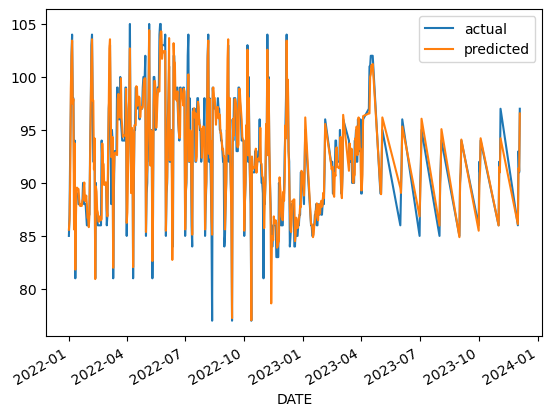

In [49]:
combined.plot()

In [50]:
reg.coef_  #precipitation, TMAX and TMIN variations are shown below 

array([-0.36933526,  0.86083026,  0.12198668])

In [51]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2021-12-31"]
    test = core_weather.loc["2022-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"],predictions)
    combined = pd.concat([test["target"],pd.Series(predictions, index=test.index)],axis =1)
    combined.columns = ["actual", "predicted"]
    return error, combined

In [52]:
core_weather["month_max"] = core_weather["Temp_Max"].rolling(30).mean()

In [53]:
core_weather

,Precip,Temp_Max,Temp_Min,target,month_max
DATE,,,,,
2013-01-01,0.0,87.0,0.0,88.0,NaN
2013-02-01,0.0,88.0,70.0,88.0,NaN
2013-03-01,0.0,88.0,72.0,88.0,NaN
2013-04-01,0.0,88.0,71.0,88.0,NaN
2013-05-01,0.0,88.0,71.0,88.0,NaN
...,...,...,...,...,...
2023-04-15,0.0,101.0,76.0,101.0,94.300000
2023-04-16,0.0,101.0,78.0,102.0,94.566667
2023-04-17,0.0,102.0,78.0,102.0,94.866667


In [54]:
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["Temp_Max"]

In [55]:
core_weather["max_min"] = core_weather["Temp_Max"] / core_weather["Temp_Min"]

In [56]:
predictors = ["Precip", "Temp_Max", "Temp_Min", "month_max", "month_day_max", "max_min"]

In [57]:
core_weather = core_weather.iloc[60:,:].copy()

In [58]:
error, combined = create_predictions(predictors, core_weather, reg)

In [59]:
error

1.1438632869803553

<Axes: xlabel='DATE'>

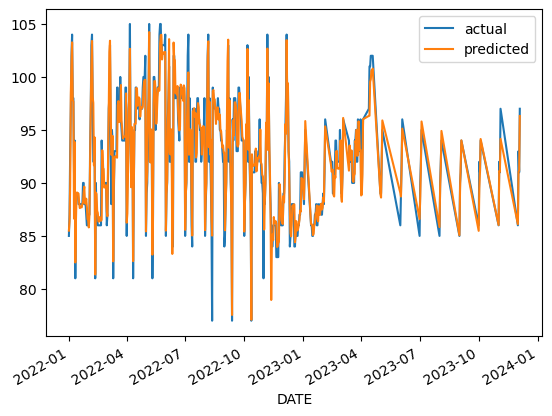

In [60]:
combined.plot()

In [61]:
core_weather

,Precip,Temp_Max,Temp_Min,target,month_max,month_day_max,max_min
DATE,,,,,,,
2013-02-03,0.0,91.0,71.0,92.0,89.200000,0.980220,1.281690
2013-03-03,0.0,92.0,69.0,92.0,89.366667,0.971377,1.333333
2013-04-03,0.0,92.0,71.0,90.0,89.533333,0.973188,1.295775
2013-05-03,0.0,90.0,74.0,90.0,89.600000,0.995556,1.216216
2013-06-03,0.0,90.0,74.0,89.0,89.666667,0.996296,1.216216
...,...,...,...,...,...,...,...
2023-04-15,0.0,101.0,76.0,101.0,94.300000,0.933663,1.328947
2023-04-16,0.0,101.0,78.0,102.0,94.566667,0.936304,1.294872
2023-04-17,0.0,102.0,78.0,102.0,94.866667,0.930065,1.307692


In [62]:
core_weather["monthly_avg"]= core_weather["Temp_Max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

C:\Users\Madhusoodhan TG\AppData\Local\Temp\ipykernel_3656\1498141147.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  core_weather["monthly_avg"]= core_weather["Temp_Max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())


In [63]:
core_weather

,Precip,Temp_Max,Temp_Min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
2013-02-03,0.0,91.0,71.0,92.0,89.200000,0.980220,1.281690,91.000000
2013-03-03,0.0,92.0,69.0,92.0,89.366667,0.971377,1.333333,92.000000
2013-04-03,0.0,92.0,71.0,90.0,89.533333,0.973188,1.295775,92.000000
2013-05-03,0.0,90.0,74.0,90.0,89.600000,0.995556,1.216216,90.000000
2013-06-03,0.0,90.0,74.0,89.0,89.666667,0.996296,1.216216,90.000000
...,...,...,...,...,...,...,...,...
2023-04-15,0.0,101.0,76.0,101.0,94.300000,0.933663,1.328947,96.118033
2023-04-16,0.0,101.0,78.0,102.0,94.566667,0.936304,1.294872,96.133987
2023-04-17,0.0,102.0,78.0,102.0,94.866667,0.930065,1.307692,96.153094


In [64]:
core_weather["day_of_year_avg"]= core_weather["Temp_Max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

C:\Users\Madhusoodhan TG\AppData\Local\Temp\ipykernel_3656\2315090720.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  core_weather["day_of_year_avg"]= core_weather["Temp_Max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())


In [65]:
predictors = ["Precip", "Temp_Max", "Temp_Min", "month_max", "month_day_max", "max_min","day_of_year_avg", "monthly_avg"]

In [66]:
error, combined = create_predictions(predictors, core_weather, reg)

In [67]:
error

1.1556106112429732

In [68]:
reg.coef_


array([-0.44817681,  0.64479568,  0.28737918,  0.01657413,  5.03505672,
       11.75975734,  0.08758105,  0.02511816])

In [69]:
core_weather.corr()["target"]

Precip            -0.203612
Temp_Max           0.942519
Temp_Min           0.769541
target             1.000000
month_max          0.829797
month_day_max     -0.381220
max_min            0.270509
monthly_avg        0.533670
day_of_year_avg    0.870072
Name: target, dtype: float64

In [70]:
combined["diff"] = (combined["actual"] - combined["predicted"]).abs()

In [71]:
combined["diff"]

DATE
2022-01-01    0.324508
2022-02-01    1.330588
2022-03-01    1.303518
2022-04-01    1.439418
2022-05-01    0.801186
                ...   
2023-04-15    1.443769
2023-04-16    2.164036
2023-04-17    1.386470
2023-04-18    1.319891
2023-04-19    1.128584
Name: diff, Length: 474, dtype: float64

In [72]:
combined.sort_values("diff",ascending=False).head()

,actual,predicted,diff
DATE,,,
2022-08-31,84.0,92.981755,8.981755
2022-10-31,81.0,89.601198,8.601198
2022-08-12,77.0,85.184494,8.184494
2022-09-05,94.0,101.389593,7.389593
2022-02-21,94.0,86.725720,7.274280


In [73]:
predictors = ["Precip", "Temp_Max", "Temp_Min", "month_max", "month_day_max", "max_min","day_of_year_avg", "monthly_avg"]
error, combined = create_predictions(predictors, core_weather, reg)

In [74]:
error

1.1556106112429732

In [75]:
combined

,actual,predicted
DATE,,
2022-01-01,85.0,85.324508
2022-02-01,87.0,85.669412
2022-03-01,86.0,87.303518
2022-04-01,85.0,86.439418
2022-05-01,85.0,85.801186
...,...,...
2023-04-15,101.0,99.556231
2023-04-16,102.0,99.835964
2023-04-17,102.0,100.613530


In [76]:
core_weather

,Precip,Temp_Max,Temp_Min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,
2013-02-03,0.0,91.0,71.0,92.0,89.200000,0.980220,1.281690,91.000000,91.000000
2013-03-03,0.0,92.0,69.0,92.0,89.366667,0.971377,1.333333,92.000000,92.000000
2013-04-03,0.0,92.0,71.0,90.0,89.533333,0.973188,1.295775,92.000000,92.000000
2013-05-03,0.0,90.0,74.0,90.0,89.600000,0.995556,1.216216,90.000000,90.000000
2013-06-03,0.0,90.0,74.0,89.0,89.666667,0.996296,1.216216,90.000000,90.000000
...,...,...,...,...,...,...,...,...,...
2023-04-15,0.0,101.0,76.0,101.0,94.300000,0.933663,1.328947,96.118033,96.727273
2023-04-16,0.0,101.0,78.0,102.0,94.566667,0.936304,1.294872,96.133987,97.727273
2023-04-17,0.0,102.0,78.0,102.0,94.866667,0.930065,1.307692,96.153094,97.818182
